In [1]:
import sys; sys.path.append('..')
from os import path
from random import choice, shuffle

from graph import Graph, ReaderORLibrary
from graph.steiner import (prunning_mst, shortest_path,
                            shortest_path_origin_prim,
                            prunning_kruskal_mst,
                            shortest_path_with_origin)

from graph.util import is_steiner_tree, has_cycle
from graph.algorithms import kruskal, prim

In [2]:
from graph.util import gg_total_weight

In [3]:
# input
dataset_file = 'steinc5.txt'

# output
csv_output = 'resultado.csv'
graphs_output = 'grafos.pickle'

In [4]:
file = path.join('..', 'datasets','ORLibrary', dataset_file)

assert path.exists(file)

reader = ReaderORLibrary()

stpg = reader.parser(file)

In [5]:
from pxcrossover import PXtree

In [6]:
crossover = PXtree(stpg)

In [7]:
vertices = list(stpg.graph.vertices)

shuffle(vertices)

In [8]:
v = vertices.pop()

aa, aa_cost = shortest_path_with_origin(stpg.graph, v, stpg.terminals)

r, test = is_steiner_tree(aa, stpg)

r, test

(True,
 {'has_cycle': False,
  'all_terminals_in': True,
  'all_leaves_are_terminals': True,
  'all_edges_are_reliable': True,
  'graph_is_connected': True})

In [9]:
%%time

data = list()

for _ in range(200):
    v = vertices.pop()
    aa, aa_cost = prunning_mst(stpg.graph, v, stpg.terminals)
    is_aa_st, _ = is_steiner_tree(aa, stpg)
    
    u = vertices.pop()
    bb, bb_cost = prunning_mst(stpg.graph, u, stpg.terminals)
    is_bb_st, _ = is_steiner_tree(bb, stpg)
    
    child, sucess, fail = crossover(aa, bb)
    cc_cost = gg_total_weight(child)
    is_cc_st, _ = is_steiner_tree(child, stpg)
    
    data.append([v, u, is_aa_st, is_bb_st, is_cc_st, aa_cost, bb_cost, cc_cost, sucess, fail])

Wall time: 10.2 s


In [10]:
import pandas as pd

In [11]:
col = [
    'start_a', 
    'start_b', 
    'is_aa_st', 
    'is_bb_st', 
    'is_cc_st' ,
    'a_cost', 
    'b_cost', 
    'c_cost',
    'p_sucess',
    'p_fail'
    ]

In [12]:
%%time 

frame = pd.DataFrame(data, columns=col)

Wall time: 6.99 ms


In [13]:
frame['less_both'] = (frame['c_cost'] < frame['a_cost']) & (frame['c_cost'] < frame['b_cost'])

In [14]:
frame['less_equal_both'] = (frame['c_cost'] <= frame['a_cost']) & (frame['c_cost'] <= frame['b_cost'])

In [15]:
frame['less_equal_a'] = (frame['c_cost'] <= frame['a_cost'])

In [16]:
frame['less_equal_b'] = (frame['c_cost'] <= frame['b_cost'])

In [17]:
frame.head()

,start_a,start_b,is_aa_st,is_bb_st,is_cc_st,a_cost,b_cost,c_cost,p_sucess,p_fail,less_both,less_equal_both,less_equal_a,less_equal_b
0,34,413,True,True,True,1637,1638,1634,3,0,True,True,True,True
1,313,161,True,True,True,1640,1638,1638,2,1,False,True,True,True
2,452,145,True,True,True,1636,1648,1636,5,5,False,True,True,True
3,263,31,True,True,True,1638,1636,1634,5,0,True,True,True,True
4,328,478,True,True,True,1640,1630,1630,4,8,False,True,True,True


In [18]:
frame[['a_cost', 'b_cost','c_cost']].min()

a_cost    1630
b_cost    1630
c_cost    1627
dtype: int64

In [19]:
frame[['a_cost', 'b_cost','c_cost']].max()

a_cost    1655
b_cost    1648
c_cost    1640
dtype: int64

In [20]:
frame[['less_both', 'less_equal_a', 'less_equal_b', 'less_equal_both']].describe()

,less_both,less_equal_a,less_equal_b,less_equal_both
count,200,200,200,200
unique,2,1,1,1
top,False,True,True,True
freq,146,200,200,200


In [21]:
frame[['is_aa_st',	'is_bb_st',	'is_cc_st']].describe()

,is_aa_st,is_bb_st,is_cc_st
count,200,200,200
unique,1,1,1
top,True,True,True
freq,200,200,200


In [22]:
frame['diff_from_a'] = frame['a_cost'] - frame['c_cost']
frame['diff_from_b'] = frame['b_cost'] - frame['c_cost']

In [23]:
df_stats = frame[['a_cost',	'b_cost', 'c_cost', 'diff_from_a', 'diff_from_b', 'p_sucess', 'p_fail']].describe()

df_stats

,a_cost,b_cost,c_cost,diff_from_a,diff_from_b,p_sucess,p_fail
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1636.645000,1636.610000,1634.130000,2.515000,2.480000,3.560000,2.270000
std,3.760276,3.283567,3.264411,3.253104,2.900286,2.153973,2.455043
min,1630.000000,1630.000000,1627.000000,0.000000,0.000000,0.000000,0.000000
25%,1634.000000,1634.000000,1633.000000,0.000000,0.000000,2.000000,0.000000
50%,1637.000000,1637.000000,1634.000000,2.000000,2.000000,3.000000,2.000000
75%,1640.000000,1640.000000,1636.000000,4.000000,4.000000,5.000000,4.000000
max,1655.000000,1648.000000,1640.000000,21.000000,12.000000,10.000000,10.000000


In [24]:
df_stats.to_clipboard()

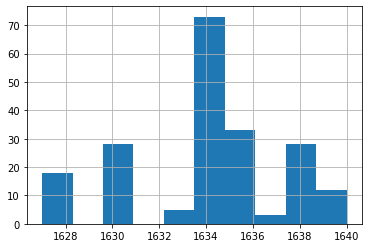

In [25]:
frame['c_cost'].hist()

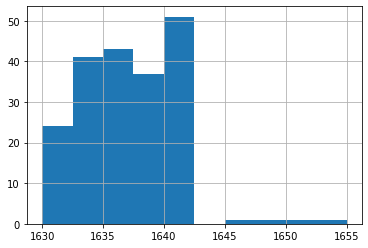

In [26]:
frame['a_cost'].hist()

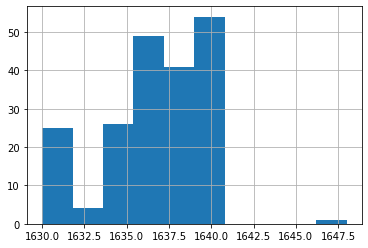

In [27]:
frame['b_cost'].hist()